In [1]:
import numpy as np  # For numerical operations
import cv2  # OpenCV for image processing
import os  # For handling file paths
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Model evaluation
from sklearn.decomposition import PCA  # Dimensionality reduction
from sklearn.preprocessing import LabelEncoder  # Encode emotion labels
from sklearn import svm  # Support Vector Machine
import matplotlib.pyplot as plt  # Visualization

In [2]:
# Function to load and preprocess images from the dataset and display samples in a grid
def load_images_from_folder(folder_path, num_samples_per_emotion=5):
    images = []
    labels = []
    samples_shown = {}  # Keep track of displayed samples for each emotion
    sample_images = []  # List to store images for grid display
    sample_labels = []  # List to store labels for grid display

    for emotion_label in os.listdir(folder_path):  # Loop through emotion folders
        emotion_folder = os.path.join(folder_path, emotion_label)
        if os.path.isdir(emotion_folder):
            samples_shown[emotion_label] = 0
            for img_file in os.listdir(emotion_folder):  # Loop through images
                img_path = os.path.join(emotion_folder, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
                if img is not None:
                    img_resized = cv2.resize(img, (48, 48))  # Resize image to 48x48
                    images.append(img_resized.flatten())  # Flatten to 1D array
                    labels.append(emotion_label)  # Use folder name as label

                    # Store sample images and labels for grid display
                    if samples_shown[emotion_label] < num_samples_per_emotion:
                        sample_images.append(img_resized)
                        sample_labels.append(emotion_label)
                        samples_shown[emotion_label] += 1

    # Display all collected sample images in a grid
    display_sample_images_in_grid(sample_images, sample_labels, num_samples_per_emotion)

    return images, labels

# Function to display sample images in a grid
def display_sample_images_in_grid(sample_images, sample_labels, num_samples_per_emotion):
    # Calculate number of rows and columns based on the number of samples
    num_samples = len(sample_images)
    num_columns = min(num_samples, num_samples_per_emotion)
    num_rows = (num_samples + num_columns - 1) // num_columns  # Round up to create enough rows

    plt.figure(figsize=(num_columns * 2, num_rows * 2))  # Adjust the size of the figure
    for i in range(num_samples):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(sample_images[i], cmap='gray')
        plt.title(f"Emotion: {sample_labels[i]}")
        plt.axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


In [3]:
# Path to CK+48 dataset (adjust according to your local directory)
dataset_folder = r"D:\Reserach\svm3\CK+48"

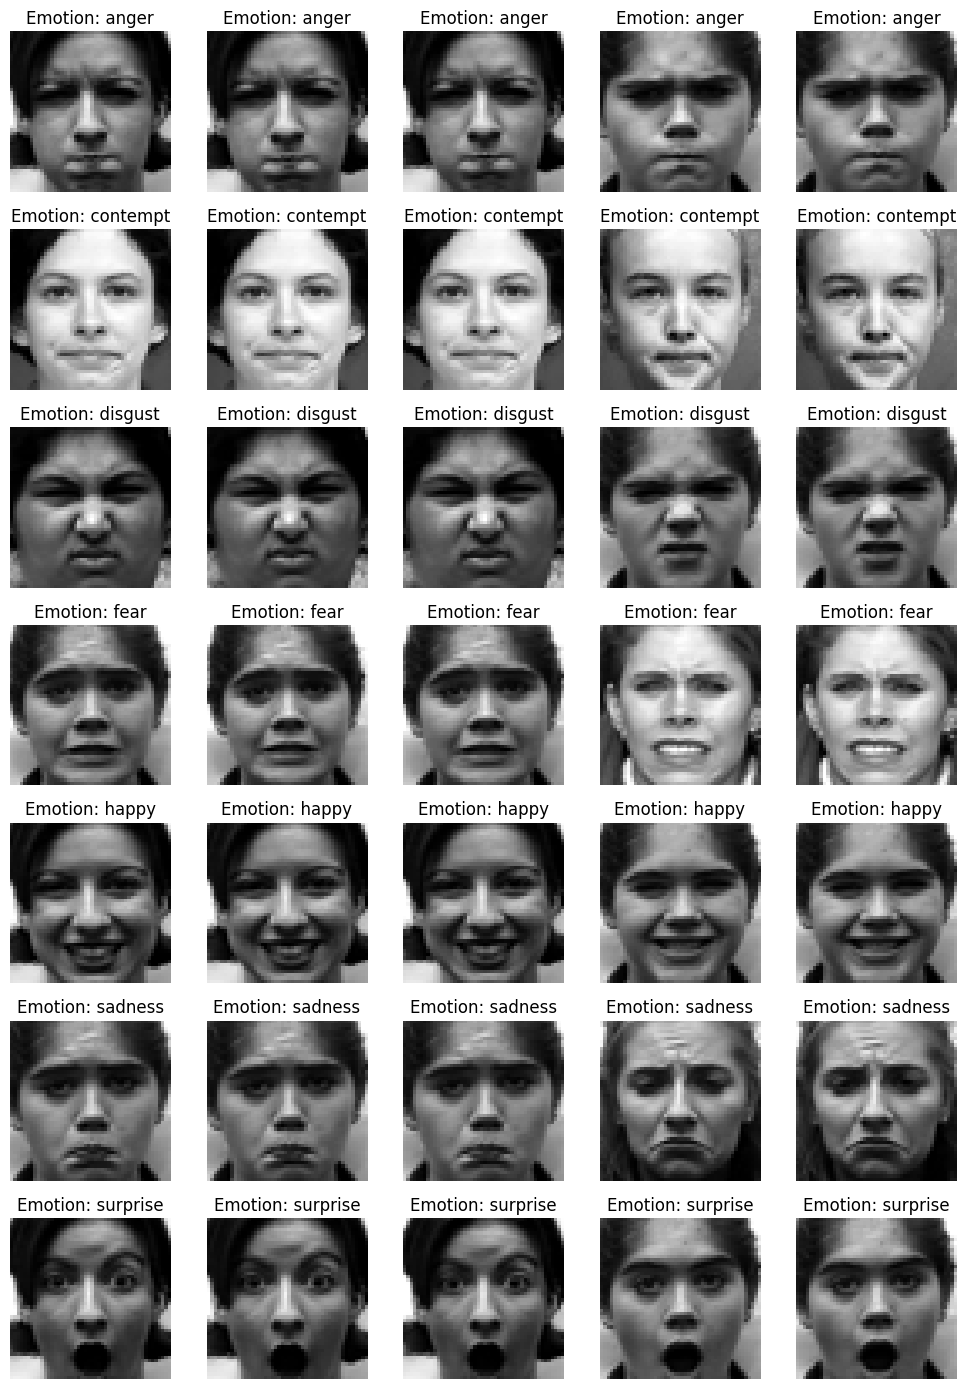

In [4]:
# Load the full dataset
X, y = load_images_from_folder(dataset_folder)

In [5]:
# Convert to numpy arrays and normalize pixel values
X = np.array(X) / 255.0
y = np.array(y)


In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Encode emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [8]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# Train SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train_pca, y_train_encoded)

# Predict on the test set
y_pred = model.predict(X_test_pca)

In [10]:

accuracy = accuracy_score(y_test_encoded,y_pred)

In [11]:
sc=model.score(X_train_pca,y_train_encoded)

In [12]:
# Evaluate the model
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Training Score: {sc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 100.00%
Training Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      1.00      1.00        35
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        42
     sadness       1.00      1.00      1.00        17
    surprise       1.00      1.00      1.00        50

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197


Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0 50]]


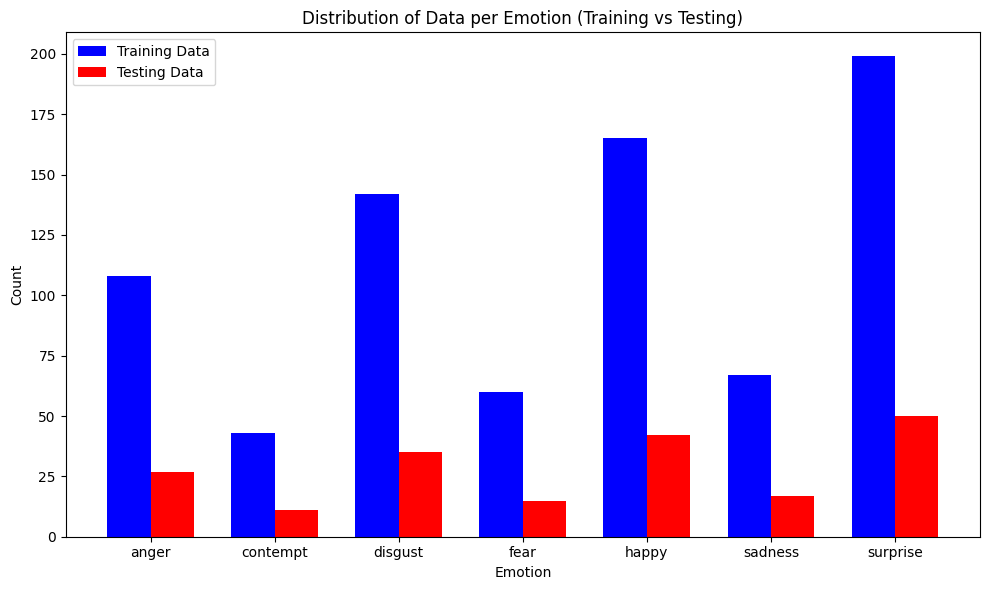

In [13]:
# Count the number of samples for each emotion in the training and testing sets
emotions_to_display = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

# Counting occurrences in training and testing data
train_counts = {emotion: 0 for emotion in emotions_to_display}
test_counts = {emotion: 0 for emotion in emotions_to_display}

for emotion in emotions_to_display:
    train_counts[emotion] = sum(y_train == emotion)
    test_counts[emotion] = sum(y_test == emotion)

# Plotting the distribution of data in training and testing sets
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis positions for each emotion
x = np.arange(len(emotions_to_display))

# Bar width
width = 0.35

# Plot the counts of each emotion in training and testing datasets
ax.bar(x - width/2, list(train_counts.values()), width, label='Training Data', color='b')
ax.bar(x + width/2, list(test_counts.values()), width, label='Testing Data', color='r')

# Labeling the plot
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
ax.set_title('Distribution of Data per Emotion (Training vs Testing)')
ax.set_xticks(x)
ax.set_xticklabels(emotions_to_display)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

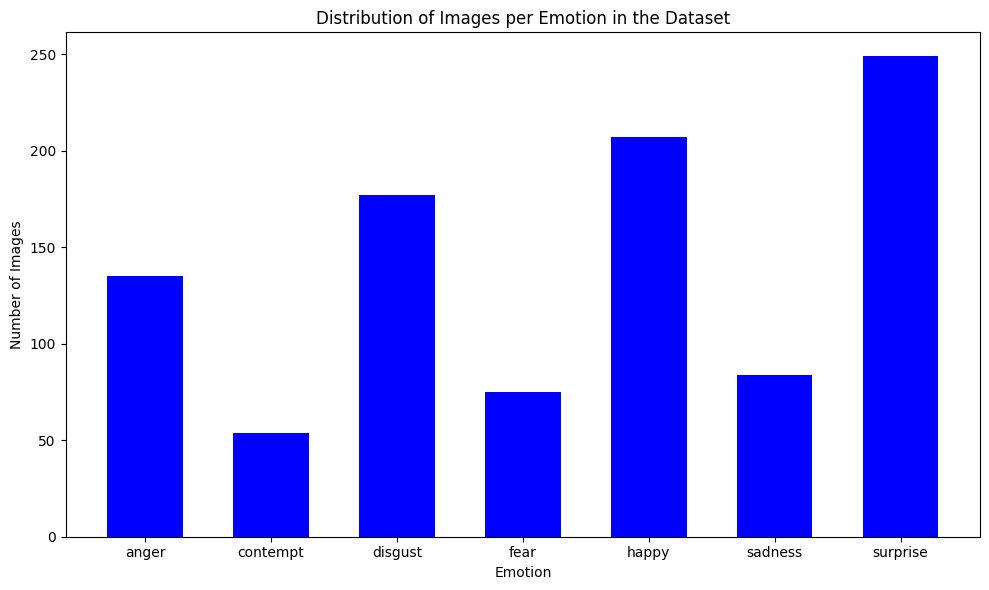

In [14]:

# Define the emotions to display
emotions_to_display = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

# Count the occurrences of each emotion in the entire dataset
emotion_counts = {emotion: 0 for emotion in emotions_to_display}

# Count the number of images for each emotion
for emotion in emotions_to_display:
    emotion_counts[emotion] = sum(y == emotion)

# Plotting the distribution of images for each emotion in the dataset
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis positions for each emotion
x = np.arange(len(emotions_to_display))

# Bar width
width = 0.6

# Plot the count of images for each emotion
ax.bar(x, list(emotion_counts.values()), width, color='b')

# Labeling the plot
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images per Emotion in the Dataset')
ax.set_xticks(x)
ax.set_xticklabels(emotions_to_display)

# Show the plot
plt.tight_layout()
plt.show()

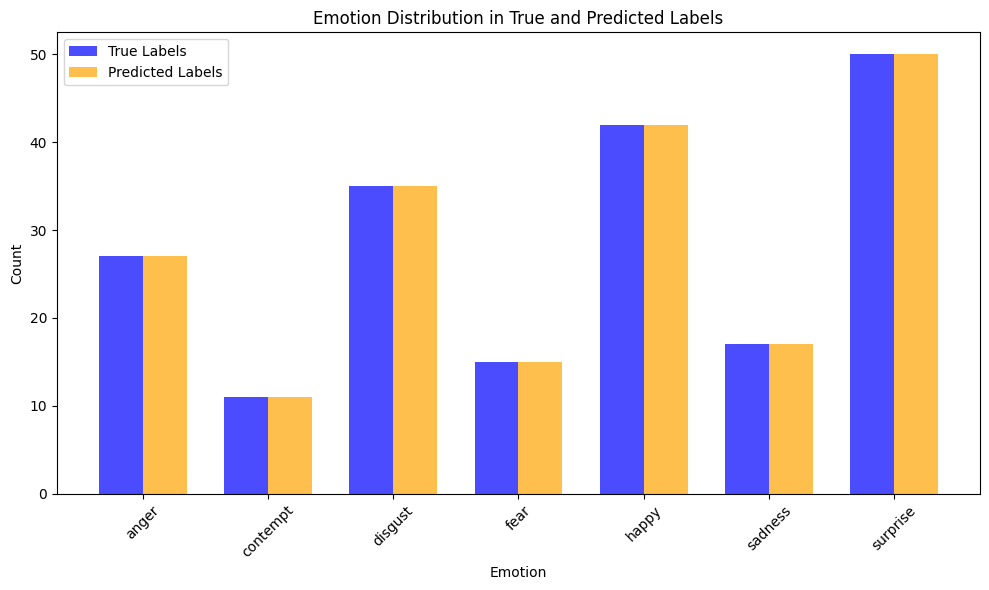

In [15]:
# Count occurrences of each emotion in true labels and predicted labels
true_label_counts = np.bincount(y_test_encoded, minlength=len(label_encoder.classes_))
pred_label_counts = np.bincount(y_pred, minlength=len(label_encoder.classes_))

# Labels for the x-axis
emotion_labels = label_encoder.classes_

# Create a bar diagram
x = np.arange(len(emotion_labels))  # Position of bars
width = 0.35  # Width of bars

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, true_label_counts, width, label='True Labels', color='blue', alpha=0.7)
plt.bar(x + width / 2, pred_label_counts, width, label='Predicted Labels', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution in True and Predicted Labels')
plt.xticks(x, emotion_labels, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

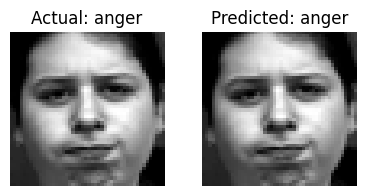

In [16]:
import matplotlib.pyplot as plt  # Visualization

emotions_to_display = ['anger']
displayed_emotions = {emotion: 0 for emotion in emotions_to_display}  # Track displayed images
num_per_emotion = 1  # Number of images to display per emotion

# Create a list to store the subplots for each emotion
all_images = []

# Iterate over the test set
for i in range(len(X_test)):
    true_label = label_encoder.inverse_transform([y_test_encoded[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]

    # Check if we need to display this emotion
    if true_label in emotions_to_display and displayed_emotions[true_label] < num_per_emotion:
        # Store the images and labels for later plotting
        all_images.append((X_test[i], true_label, pred_label))
        displayed_emotions[true_label] += 1

    # Stop once all emotions have been displayed
    if all(count >= num_per_emotion for count in displayed_emotions.values()):
        break

# Create a figure for displaying the images
fig, axes = plt.subplots(
    1, 
    num_per_emotion * 2, 
    figsize=(4, 2)  # Larger figure size for clarity
)

# Ensure `axes` is iterable
if num_per_emotion * 2 == 1:
    axes = [axes]  # Wrap single subplot in a list

# Display the images
for col, (image, true_label, pred_label) in enumerate(all_images):
    # Actual image
    ax_actual = axes[col * 2]
    ax_actual.imshow(image.reshape(48, 48), cmap='gray')
    ax_actual.set_title(f"Actual: {true_label}")
    ax_actual.axis('off')

    # Predicted image
    ax_pred = axes[col * 2 + 1]
    ax_pred.imshow(image.reshape(48, 48), cmap='gray')
    ax_pred.set_title(f"Predicted: {pred_label}")
    ax_pred.axis('off')

plt.tight_layout()
plt.show()

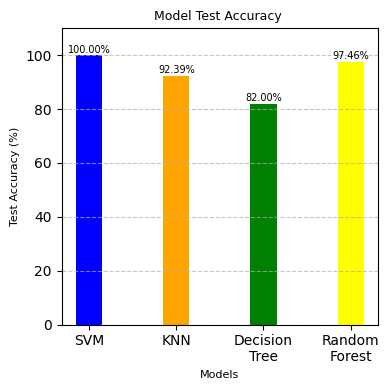

In [1]:
import matplotlib.pyplot as plt

# Data for the bar diagram
models = ['SVM', 'KNN', 'Decision\nTree', 'Random\nForest']
accuracies = [100.00, 92.39, 82.00, 97.46]

# Create the bar diagram with an adjusted smaller size
plt.figure(figsize=(4, 4))  # Adjust figure size
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'yellow'], width=0.3)

# Add labels and title
plt.xlabel('Models', fontsize=8)
plt.ylabel('Test Accuracy (%)', fontsize=8)
plt.title('Model Test Accuracy ', fontsize=9)
plt.ylim(0, 110)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show percentage values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=7)

# Display the plot
plt.tight_layout()
plt.show()


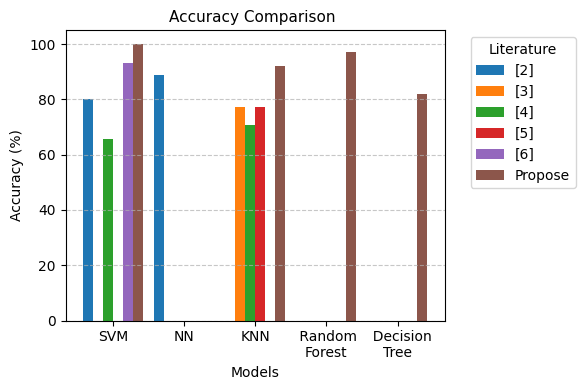

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
methods = ["SVM", "NN", "KNN", " Random\nForest", "  Decision\nTree"]
accuracy = {
    "[2]": [80, 89, None, None, None],
    "[3]": [None, None, 77.29, None, None],
    "[4]": [65.5, None, 70.87, None, None],
    "[5]": [None, None, 77.27, None, None],
    "[6]": [93.29, None, None, None, None],
    "Propose": [100, None, 92, 97, 82]
}

# Colors for each method
colors = ["blue", "orange", "green", "red", "purple"]

# Plotting
x = np.arange(len(methods))  # positions for methods
bar_width = 0.14  # width of each bar

fig, ax = plt.subplots(figsize=(6, 4))

# Iterate over accuracy dictionaries to create bars for each study
for i, (study, scores) in enumerate(accuracy.items()):
    ax.bar(x + i * bar_width, [score if score is not None else 0 for score in scores], 
           bar_width, label=study)

# Customize plot
ax.set_xlabel("Models", fontsize=10)
ax.set_ylabel("Accuracy (%)", fontsize=10)
ax.set_title("Accuracy Comparison ", fontsize=11)
ax.set_xticks(x + (len(accuracy) - 1) * bar_width / 2)
ax.set_xticklabels(methods)
ax.legend(title="Literature", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
